# Yelp Restaurant Recommendation System

---------------
## Context
---------------

Yelp Inc. is an American company that develops the Yelp.com website and the Yelp mobile app, which publish crowd-sourced reviews about businesses. It also operates Yelp Guest Manager, a table reservation service. It is headquartered in San Francisco, California.Yelp was founded in 2004 by former PayPal employees Russel Simmons and Jeremy Stoppelman. Yelp grew in usage and raised several rounds of funding in the following years.Today, the website and their mobile application publish crowd-sourced reviews about local businesses as well as certain metadata about them that can help in customer's **decision-making process**.Yelp uses automated software to recommend the **most helpful** and **reliable reviews** for the Yelp community from such a large and diverse dataset.

This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries. In the most recent dataset you'll find information about businesses across 8 metropolitan areas in the USA and Canada.

-----------------
## Objective
-----------------

In this case study, we will build three types of recommendation systems: 
- **Clustering-based recommendation system**
- **Content-based collaborative filtering**

-----------------
## Dataset
-----------------

We will only use the following four attributes from the **yelp_reviews dataset**: 
- business_id
- business_name
- stars
- user_id
- text: The text review by the user

In [2]:
# Install the surprise package using the following line of code

!pip install surprise

## **Importing the necessary libraries and overview of the dataset**

In [3]:
# Importing necessary libraries

import warnings                                               # Used to ignore the warnings in the error message
warnings.filterwarnings('ignore')

import numpy as np                                            # A basic python package for numerical operations
import pandas as pd                                           # A python library to process and do computations on the data frames

import matplotlib.pyplot as plt                               # A basic library to do data visualizations
import seaborn as sns                                         # A slightly advanced one for data visualization
from collections import defaultdict                           # A dictionary output that does not raise a key error
from sklearn.metrics.pairwise import cosine_similarity        # To compute the cosine similarity between vectors
from sklearn.preprocessing import LabelEncoder                # To do label encoding

### **Loading the data**

In [5]:
# Import the dataset
reviews = pd.read_csv(r'C:\Users\isabe\Downloads\yelp-dataset\yelp.csv', usecols = ['user_id', 'business_id', 'business_name', 'stars', 'text'])

# See the first 5 records of the dataset
reviews.head()

,business_id,business_name,stars,text,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,3.0,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA
1,YjUWPpI6HXG530lwP-fb2A,Kettle Restaurant,3.0,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A
2,kxX2SOes4o-D3ZQBkiMRfA,Zaika,5.0,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ
3,e4Vwtrqf-wpJfwesgvdgxQ,Melt,4.0,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ
4,04UD14gamNjLY0IDYVhHJg,Dmitri's,1.0,I am a long term frequent customer of this est...,eUta8W_HdHMXPzLBBZhL1A


In [7]:
reviews.shape

(5126276, 5)

In [6]:
# Check the info of the data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126276 entries, 0 to 5126275
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   business_id    object 
 1   business_name  object 
 2   stars          float64
 3   text           object 
 4   user_id        object 
dtypes: float64(1), object(4)
memory usage: 195.6+ MB


- There are **5126276 observations and 5 columns** in the data.
- There are **no missing values** in the data.
- All the **columns are of object data type except the stars column** which is of numeric data type.

## **Data Exploration**

Let's start with the data exploration.

**Print the top 5 rows of the dataset and describe the dataset.**  

In [8]:
# Printing the first 5 rows of the dataset
reviews.head()

,business_id,business_name,stars,text,user_id
0,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,3.0,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA
1,YjUWPpI6HXG530lwP-fb2A,Kettle Restaurant,3.0,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A
2,kxX2SOes4o-D3ZQBkiMRfA,Zaika,5.0,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ
3,e4Vwtrqf-wpJfwesgvdgxQ,Melt,4.0,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ
4,04UD14gamNjLY0IDYVhHJg,Dmitri's,1.0,I am a long term frequent customer of this est...,eUta8W_HdHMXPzLBBZhL1A


#### **Describe the distribution of ratings**

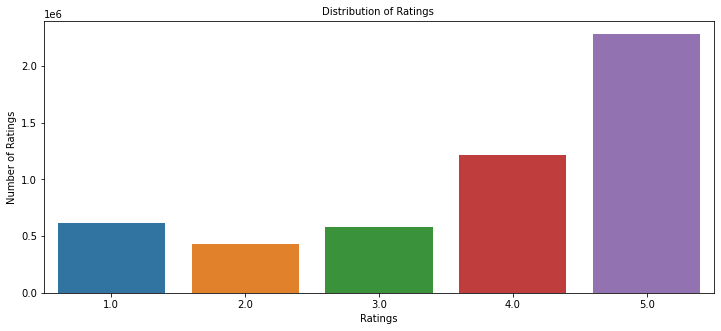

In [9]:
# Fix the figure size of the plot
plt.figure(figsize = (12, 5))

# Code to create the countplot
ax = sns.countplot(x="stars", data = reviews)

plt.tick_params(labelsize = 10)

plt.title("Distribution of Ratings ", fontsize = 10)

plt.xlabel("Ratings", fontsize = 10)

plt.ylabel("Number of Ratings", fontsize = 10)

# Show the plot
plt.show()

**Observations:**

* Data seems to be **highly skewed** towards Rating **'4' and '5'**. Rating **'5'** is the second-highest in the count and nearly the same as the number of 4 rating count. 

* We can see very few people are giving ratings **between 1 to 3**. It shows people tend to **not give a rating** for a restaurant that they **dislike**.

#### **What is the total number of unique users and unique Restaurants?**

In [10]:
# Number of unique users
reviews['user_id'].nunique()

1505695

In [11]:
# Number of unique Restaurant 
reviews['business_id'].nunique()

64629

**Observations:**
- There are **1505695 users** in the dataset
- There are **64629 Restaurants** in the dataset
- As per the number of unique users and Restaurant, there is a **possibility of 1505695 * 64629 = ~ 97 x 10^9 ratings** in the dataset. But **we have 5126276 ratings**, i.e., not every user has rated every Restaurant in the dataset. And we can build a recommendation system to recommend a restaurant to users which they have not interacted with.

#### **Is there any restaurant that has been visited more than once by the same user?**

In [12]:
reviews.groupby(['user_id', 'business_id']).count()

business_name  stars  text
user_id                business_id                                       
---2PmXbF47D870stH1jqA 0ZsqqzHu1HHkDdIKoivi5g              1      1     1
                       1An4DxtMmvvSe0HX4viRCA              3      3     3
                       3YqUe2FTCQr0pPVK8oCv6Q              1      1     1
                       3gXgILE2YWVidJDvVWBT6Q              1      1     1
                       HpWi2CRJlxVCYKd8kS0X-A              1      1     1
...                                                      ...    ...   ...
zzz-M4QvkEpUWWPL9RTzLA nKJ6RnjIVfWrXO2DUrBgCw              1      1     1
zzzCg-_lpyYE82TlJCdwdw LttC5xNMFcgOg3bt_MlXTg              1      1     1
zzzGgfvrSJ4AQeKtcgocIw XyYsl2OyoMi6OMvzsdcVoQ              1      1     1
zzzMBVS73g3ZJ7qL8JyhiA 3FKIev7ZB_KE6XHL9sUJCg              1      1     1
zzzUFM4HFe0SFG0bPjntQA xe2L_RvBNgkrVburQrfW_Q              1      1     1

[4950805 rows x 3 columns]

In [13]:
reviews.groupby(['user_id', 'business_id']).count()['stars'].sum()

5126276

- The **sum is equal to the total number of observations** which implies that **there is only interaction between a pair of user and a restaurant**.

#### **Which Restaurant is the most reviewed Restaurant in the dataset?**

In [14]:
reviews['business_id'].value_counts()

_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
                          ... 
Tz4I_iLZz4ex7injzr0Xhw       5
g-GurkPLhwx13WNehQUlaQ       5
mYyFlgnrOHLLr79Htnl2YA       5
7NkedKr4d56ZKGSc_Ywe-g       5
Tj9FmBCHd84kjAE9vcoBnw       5
Name: business_id, Length: 64629, dtype: int64

**Observations:**
- The **Restaurant with business_id: _ab50qdWOk0DdB6XOrBitw  has been interacted by most users** which is **7673** times.
- But still, there is a possibility of **1505695-7673 = 1,498,022** more interactions as we have **1505695** unique users in our datasets. For those  **remaining users**, we can build a **recommendation system** to predict who is most likely to visit the Restaurant.
- Also, out of these **7673 interactions**, we need to consider the distribution of ratings as well to check whether this Restaurant is the **most liked or most disliked Restaurant**.

#### **Which user interacted the most with any Restaurant in the dataset?**

In [16]:
reviews['user_id'].value_counts()

_BcWyKQL16ndpBdggh2kNA    2110
-G7Zkl1wIWBBmD0KRy_sCw    1459
ET8n-r7glWYqZhuR6GcdNw    1276
fr1Hz2acAb3OaL3l6DyKNg    1254
1HM81n6n4iPIFU5d2Lokhw    1198
                          ... 
H4LoKfEntdhzVwOX_V-qgg       1
AlwVVS0-O7EdQN97r6v2Aw       1
dCMseuMVeM86bFO4_e3WNw       1
H91Bm06ivGQDCVMoh_qdCA       1
3kJ4ktaXV-RVm49M-y1uTg       1
Name: user_id, Length: 1505695, dtype: int64

**Observations:**
- The user with **user_id: 1HM81n6n4iPIFU5d2Lokhw** have interacted with the most number of restaurants, i.e., **1198** times. 
- But still, there is a possibility of **64629-1198 = 63,431** more interactions as we have **64,629 unique Restaurants** in our dataset. For those **63,431** remaining Restaurants, we can build a recommendation system to predict which restaurants are most likely to be reviewed by this user.

The user with user_id 1HM81n6n4iPIFU5d2Lokhw has interacted with the most number of restaurants, i.e., 1198 times.
But still, there is a possibility of 64629-1198 = 63,431 more interactions as we have 64,629 unique restaurants in our dataset. For those 63,431 remaining restaurants, a recommendation system can be built to predict which restaurants are most likely to be reviewed by this user.

**As this dataset is very large and has 5126276 observations, it is not computationally possible to build a model using this. Moreover, there are many users who have only rated a few restaurants and also there are restaurants which are rated by very less users. Hence we can reduce the dataset by considering certain Logical assumption.**

Here, We will be taking users who have given at least 100 rating, as we prefer to have some number of rating of a restaurant.

In [18]:
# Get the column containing the users
users = reviews.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1   

In [19]:
# We want our users to have at least 100 ratings to be considred
RATINGS_CUTOFF = 100

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
reviews = reviews.loc[ ~ reviews.user_id.isin(remove_users)]

The columns **business_id** and **user_id** are encrypted to provide anonymity. To ease our processing of the dataset we will use **label encodings** to process these two variables.

In [20]:
# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
reviews['user_id'] = le.fit_transform(reviews['user_id'])

# Fit transform the business_id column
reviews['business_id'] = le.fit_transform(reviews['business_id'])

In [21]:
# See the first 5 records
reviews.head()

,business_id,business_name,stars,text,user_id
3,36604,Melt,4.0,Cute interior and owner (?) gave us tour of up...,1840
9,24716,LaScala's,4.0,Good food--loved the gnocchi with marinara\nth...,2632
18,35139,Naked Tchopstix Express,4.0,I was really between 3 and 4 stars for this on...,1350
39,13841,Village Whiskey,5.0,"On a scale of one to things that are awesome, ...",1680
41,27975,Jasmine Rice - Rittenhouse,4.0,It was my fiance's birthday and he decided he ...,918


In [22]:
# Calculating average ratings
average_rating = reviews.groupby('business_id').mean()['stars']

# Calculating the count of ratings
count_rating = reviews.groupby('business_id').count()['stars']

# Making a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})

To demonstrate the **clustering-based recommendation system** the **Surprise package** is introduced in this case study.
- Please use the following code to install the surprise library. You only do it once while running the code for the first time.

**!pip install surprise**

In [23]:
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing clustering based recommendation system
from surprise import CoClustering

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k and recall@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.

In [24]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Returns precision and recall at k metrics for each user."""

    # First map the predictions to each user
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions = model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant. When n_rec_k is 0, 
        # Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended. When n_rel is 0, 
        # Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    
    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2*precision * recall) / (precision + recall), 3))

Below we are loading the **`rating` dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**.

In [25]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
data = Dataset.load_from_df(reviews[['user_id', 'business_id', 'stars']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

## **Cluster-Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in restaurants based on how they rate different restaurants. We cluster similar users together and recommend restaurants to a user based on ratings from other users in the same cluster.

- **Co-clustering** is a set of techniques in **Cluster Analysis**. Given some **matrix A, we want to cluster rows of A and columns of A simultaneously**, this is a common task for user-item matrices. 

- As it clusters both the rows and columns simultaneously, it is also called **bi-clustering**. To understand the working of the algorithm let A be m x n matrix, goal is to generate co-clusters: a subset of rows that exhibit similar behavior across a subset of columns, or vice versa.

- Co-clustering is defined as two map functions:
rows -> row cluster indexes
columns -> column cluster indexes
These map functions are learned simultaneously. It is **different from other clustering techniques** where we cluster **first the rows and then the columns**. 

In [26]:
# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 0.9997
Precision:  0.799
Recall:  0.382
F_1 score:  0.517




* We have calculated **RMSE** to check **how far the overall predicted ratings** are from the **actual ratings**.

* Here **F_1 score** of the **baseline model is almost 0.517**. It indicates that **recommended restaurants were relevant and relevant restaurants were recommended for more than half the recommendations**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

Let's now predict a rating for a user with `userId = 4` and `business_Id = 9483` as shown below.

In [27]:
# Making prediction for user_id 4 and business_id 9483
clust_baseline.predict(4, 9483, r_ui = 5, verbose = True)

user: 4          item: 9483       r_ui = 5.00   est = 3.93   {'was_impossible': False}


Prediction(uid=4, iid=9483, r_ui=5, est=3.9322065599964104, details={'was_impossible': False})

As we can see - the **actual rating** for this **user-item pair is 5** and the **predicted rating is 3.93 by this Co-clustering based baseline model**. It seems like the model has under-estimated the rating. We will try to fix this later by tuning the hyperparameters of the model using GridSearchCV.

Below we are predicting rating for the same `userId = 4` but for a restaurant which this user has not visited before, i.e., `business_id = 9980`, as shown below.

In [28]:
# Making prediction for userid 4 and business_id 9980
clust_baseline.predict(4, 9980, verbose = True)

user: 4          item: 9980       r_ui = None   est = 4.15   {'was_impossible': False}


Prediction(uid=4, iid=9980, r_ui=None, est=4.14984150349537, details={'was_impossible': False})

We can see that **estimated rating** for this user-item pair is 3.70 based on this Co-clustering based baseline model.

### **Improving clustering based recommendation system by tuning its hyper-parameters**

Below we will be tuning hyper-parameters for the `CoClustering` algorithms. Let's try to understand different hyperparameters of this algorithm.

- **n_cltr_u** (int) – Number of **user clusters**. The default value is 3.
- **n_cltr_i** (int) – Number of **item clusters**. The default value is 3.
- **n_epochs** (int) – Number of **iteration of the optimization loop**. The default value is 20.
- **random_state** (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from numpy is used. The default value is None.
- **verbose** (bool) – If True, the current epoch will be printed. The default value is False.

In [29]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0070751643767089
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 30}


Once the grid search is **complete**, we can get the **optimal values** for each of those hyper-parameters as shown above.

Now we will build **final model** by using tuned values of the hyperparameters which we received by using grid search cross-validation.

In [30]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,n_cltr_i = 3, n_epochs = 40, random_state = 1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 0.9997
Precision:  0.799
Recall:  0.382
F_1 score:  0.517


- We can see that the **F_1 score** for **tuned co-clustering model** on testset is **comparable with F_1 score** for baseline Co-clustering model. The model performance has not improved by much.

Let's now **predict rating** for a user with `userId = 4` and for `business_id = 9483` as shown below.Here the user has already rated the restaurant.

In [31]:
# Using co_clustering_optimized model to recommend for userId 4 and business_id 9483
clust_tuned.predict(4, 9483, r_ui = 5, verbose = True)

user: 4          item: 9483       r_ui = 5.00   est = 3.93   {'was_impossible': False}


Prediction(uid=4, iid=9483, r_ui=5, est=3.931829909862712, details={'was_impossible': False})

Below we are predicting rating for the same `userId = 4` but for a restaurant which this user has not visited before, i.e., `business_id = 9980`, as shown below.

In [32]:
# Using Co_clustering based optimized model to recommend for userId 4 and business_id 9980 with unknown baseline rating
clust_tuned.predict(4, 9980, verbose = True)

user: 4          item: 9980       r_ui = None   est = 4.15   {'was_impossible': False}


Prediction(uid=4, iid=9980, r_ui=None, est=4.1497353828706585, details={'was_impossible': False})

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

The input parameters of the below function are as follows.

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of restaurants we want to recommend**
- algo: The algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [33]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended restaurants ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'business_id', values = 'stars')
    
    # Extracting those restaurants ids which the user_id has not interacted yet
    non_interacted_restaurants = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the restaurants ids which user_id has not interacted yet
    for item_id in non_interacted_restaurants:
        
        # Predicting the ratings for those non interacted restaurants ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted rating restaurants for this user
    return recommendations[:top_n]

In [37]:
# Getting top 5 recommendations for user_id 4 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(reviews, 4, 5, clust_tuned)

### **Correcting the Ratings and Ranking the above restaurants

While comparing the ratings of two products, it is not only the **ratings** that describe the **likelihood of the user to that product**. Along with the rating the **number of users who have seen that product** also becomes important to consider. Due to this, we have calculated the **"corrected_ratings"** for each product. Commonly higher the **"rating_count" of a product more it is liked by users**. To interpret the above concept, a **product rated 4 with rating_count 3 is less liked in comparison to a product rated 3 with a rating count of 50**. It has been **empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product**.

In [38]:
def ranking_restaurants(recommendations, final_rating):
  
  # Sort the restaurants based on ratings count
  ranked_restaurants = final_rating.loc[[items[0] for items in recommendations]].sort_values('rating_count', ascending = False)[['rating_count']].reset_index()

  # Merge with the recommended restaurants to get predicted ratings
  ranked_restaurants = ranked_restaurants.merge(pd.DataFrame(recommendations, columns = ['business_id', 'predicted_ratings']), on = 'business_id', how = 'inner')

  # Rank the restaurants based on corrected ratings
  ranked_restaurants['corrected_ratings'] = ranked_restaurants['predicted_ratings'] - 1 / np.sqrt(ranked_restaurants['rating_count'])

  # Sort the restaurants based on corrected ratings
  ranked_restaurants = ranked_restaurants.sort_values('corrected_ratings', ascending = False)
  
  return ranked_restaurants

**Note:** In the **above-corrected rating formula**, we can add the **quantity `1 / np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some restaurants with ratings 5 and **we can't have a rating more than 5 for a restaurant**.

In [39]:
# Ranking restaurants based on above recommendations
ranking_restaurants(clustering_recommendations, final_rating)

,business_id,rating_count,predicted_ratings,corrected_ratings
0,6,8,5,4.646447
1,8,4,5,4.500000
2,25,4,5,4.500000
3,0,2,5,4.292893
4,9,2,5,4.292893


**Let us now move to the final recommendation algorithm which is named the Content-based recommendation system.**

## **Content-based recommendation system**

In a content-based recommendation system, we would be using the feature - **text**, i.e., reviews to find out similar businesses.

Text data generally contains pronunciation, stopwords, non-ASCII characters which makes it **very noisy**. So, we will first need to **pre-process the text** and then we will **generate features from the text to compute similarities** between the texts/reviews. Before that, let's see some terminology:

**stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.
**Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [40]:
# Importing regular expression
import re

# Importing word tokenize
from nltk import word_tokenize

# Importing word WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Importing word stopwords
from nltk.corpus import stopwords

# Importing word TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
def tokenize(text):
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

### **Feature Extraction**

Below are some of the ways to extract features from texts.
- Bag of words
- TF-IDF
- One hot encoding
- Word vectors

Here, we will be using **tfidf** as a feature extraction technique.

In [79]:
# Selecting a random subset of the original data
reviews_small = reviews.sample(n = 1000, random_state = 42)

In [80]:
# Selecting a random subset of the original data
reviews_small

,business_id,business_name,stars,text,user_id
4352941,24043,Joclyn's,3.0,You know its bad that I couldn't even remember...,1219
3649550,44850,Red Mesa Cantina,3.0,Came here for a quick Sunday lunch. It was kin...,2519
5122762,54194,Wabi Sabi,5.0,This is the 3rd time I've had Wabi Sabi and it...,2236
1026316,27046,The Eagle,4.0,"Pretty good place to eat and drink, especially...",2847
1647384,24516,Deanie's Seafood,4.0,Finally fulfilled my craving for crawfish here...,1300
...,...,...,...,...,...
864223,17953,A&M Bakery Cafe,4.0,Independently owned and operated. Small hole i...,159
4299960,13721,Brasserie by Niche,4.0,Came here for Dinner on a Tuesday and then Bru...,2584
2278502,13298,New York New York Pizza,4.0,"The pizza is New York style, thin crust and ta...",1330
3855194,9878,Papa Joe's Sub Shop,3.0,"Came by on Friday afternoon, very slow. We got...",391


In [81]:
# Find the restaurant with the highest rating
highest_rating = reviews_small['stars'].max()

# Filter the dataset to get the restaurant(s) with the highest rating
restaurant_highest_rating = reviews_small[reviews_small['stars'] == highest_rating]

# Print the restaurant(s) with the highest rating
print("Restaurant(s) with the highest rating:")
print(restaurant_highest_rating)


Restaurant(s) with the highest rating:
         business_id                     business_name  stars  \
5122762        54194                         Wabi Sabi    5.0   
1262906        31676                     KC's Pastries    5.0   
2511355        50442                           317 BBQ    5.0   
3974586         9625               Restaurant Andiario    5.0   
2425917        54180           Stein's Market and Deli    5.0   
...              ...                               ...    ...   
973842         40497                        China King    5.0   
3897216        45153  Nan Zhou Hand Drawn Noodle House    5.0   
4986326        53416                         Blackbird    5.0   
1175892        33032     Pearings Cafe + Frozen Yogurt    5.0   
2395009        26495                Fortel's Pizza Den    5.0   

                                                      text  user_id  
5122762  This is the 3rd time I've had Wabi Sabi and it...     2236  
1262906  My absolute favorite bakery in 

In [84]:
# Selecting a random subset of the original data
reviews_subset = reviews.sample(n = 1000, random_state = 42)

# Setting the index
reviews_small = reviews_subset.set_index('business_name')

# Creating the indices object
indices = pd.Series(reviews_small.index)

# Let us see the first 5 indices
indices[:5]

0            Joclyn's
1    Red Mesa Cantina
2           Wabi Sabi
3           The Eagle
4    Deanie's Seafood
Name: business_name, dtype: object

In [85]:
# Import nltk
import nltk

In [86]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [87]:
# Downlaod the punkt for punctuation
nltk.download("punkt")

# Downlaod the stopwords
nltk.download('stopwords')

# Download the wordnet
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isabe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
# Create the TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

review_tfidf = tfidf.fit_transform(reviews_small['text'].values).toarray()

In [89]:
# Let us view the review_tfidf dataframe
pd.DataFrame(review_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have extracted **8629 features** from the text data. Now, we can find similarities between businesses using these features. We will use cosine similarity to calculate the similarity.

In [90]:
similar_review = cosine_similarity(review_tfidf, review_tfidf)
similar_review

array([[1.        , 0.01201926, 0.03013148, ..., 0.01004682, 0.02852451,
        0.02044499],
       [0.01201926, 1.        , 0.01485418, ..., 0.01193416, 0.05631335,
        0.02498969],
       [0.03013148, 0.01485418, 1.        , ..., 0.00525395, 0.02597347,
        0.01576876],
       ...,
       [0.01004682, 0.01193416, 0.00525395, ..., 1.        , 0.04180027,
        0.04295381],
       [0.02852451, 0.05631335, 0.02597347, ..., 0.04180027, 1.        ,
        0.08076952],
       [0.02044499, 0.02498969, 0.01576876, ..., 0.04295381, 0.08076952,
        1.        ]])

**Finally, let's create a function to find most similar businesses to recommend for a given business.**

In [91]:
# Function that takes in business title as input and returns the top 10 recommended businesses
def recommendations(title, similar_review):
    
    recommended_businesses = []
    
    indices = pd.Series(reviews_small.index)
    
    # Getting the index of the business that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_review[idx]).sort_values(ascending = False)

    # Getting the indices of 10 most similar businesses
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    
    # Let us print the top_10_indexes
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching businesses
    for i in top_10_indexes:
        recommended_businesses.append(list(reviews_small.index)[i])
        
    return recommended_businesses

In [92]:
# Implement the recommendations function
recommendations("Joclyn's", similar_review)

[555, 741, 869, 660, 479, 696, 411, 171, 464, 158]


['Strange Bird',
 "Bertucci's Italian Restaurant",
 "Dmac's Bar & Grill",
 "Montgomery's Grill & Saloon",
 "Sam's Silver Circle Bar",
 'Music City Tippler',
 'Mermaid Tavern',
 'Castle Bake',
 'Ijji Sushi',
 'The Moon Under Water']

In [95]:
# List of restaurant names
restaurant_names = ['Strange Bird', "Bertucci's Italian Restaurant", "Dmac's Bar & Grill", "Montgomery's Grill & Saloon", "Sam's Silver Circle Bar", 'Music City Tippler', 'Mermaid Tavern', 'Castle Bake', 'Ijji Sushi', 'The Moon Under Water']

# Filter the dataset for the restaurants in the list
filtered_restaurants = reviews_subset[reviews_subset['business_name'].isin(restaurant_names)]

# Get the ratings of the filtered restaurants
restaurant_ratings = filtered_restaurants[['business_name', 'stars']]

# Print the ratings
print("Ratings of the restaurants:")
print(restaurant_ratings)

Ratings of the restaurants:
                         business_name  stars
1243926           The Moon Under Water    2.0
2393465                    Castle Bake    4.0
3770267                 Mermaid Tavern    4.0
1268847                     Ijji Sushi    1.0
2521831        Sam's Silver Circle Bar    4.0
1990949                   Strange Bird    4.0
928860     Montgomery's Grill & Saloon    3.0
4649156             Music City Tippler    5.0
4515741  Bertucci's Italian Restaurant    4.0
4523799             Dmac's Bar & Grill    5.0


- The **Dmac's Bar & Grill and Music City Tippler** is a top-rated restaurants in the subset reviews_small and the majority of our recommendations are restaurants with 4 or 5 stars which implies that the resulting recommendation system is working well.

### **Conclusion**

In this notebook, we have seen below recommendation techniques: 
- **Clustering based recommendation systems**
- **Content based recommendation systems**

We can further combine all the recommendation techniques we have see so far to create a hybrid recommendation system.